Step 1: Data Loading & Basic Exploration

In [1]:
# ---------------------------
# 1. Import required libraries
# ---------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization aesthetics
sns.set_style("whitegrid")

# ---------------------------
# 2. Load the dataset
# ---------------------------
file_path = '../data/Weather_Data_1980_2024(hourly).csv'
df = pd.read_csv(file_path)

# Show shape and first few rows
print(f" Dataset Shape: {df.shape}")
df.head()


 Dataset Shape: (389496, 17)


time  temperature  relative_humidity  dew_point  \
0  1980-01-01T00:00         12.7                 83       10.0   
1  1980-01-01T01:00         12.9                 82        9.9   
2  1980-01-01T02:00         13.2                 82       10.2   
3  1980-01-01T03:00         15.9                 78       12.0   
4  1980-01-01T04:00         19.4                 67       13.1   

   precipitation (mm)  rain (mm)  snowfall (cm)  pressure_msl (hPa)  \
0                 0.0        0.0              0              1012.8   
1                 0.0        0.0              0              1012.2   
2                 0.0        0.0              0              1012.3   
3                 0.0        0.0              0              1013.5   
4                 0.0        0.0              0              1014.6   

   surface_pressure (hPa)  cloud_cover (%)  cloud_cover_low (%)  \
0                   945.1                1                    1   
1                   944.5                4                    4   
2                   944.7               13                   14   
3                   946.4               23                   26   
4                   948.2                9                   10   

   cloud_cover_mid (%)  cloud_cover_high (%)  vapour_pressure_deficit (kPa)  \
0                    0                     0                           0.25   
1                    0                     0                           0.26   
2                    0                     0                           0.27   
3                    0                     0                           0.40   
4                    0                     0                           0.75   

   wind_speed_10m (km/h)  wind_direction  is_Day  
0                    7.5             235       0  
1                    7.9             231       0  
2                    7.5             235       1  
3                    6.6             248       1  
4                    8.7             265       1

Understand the Columns

In [2]:
print(" Column Names:")
print(df.columns.tolist())

print("\n Data Types:")
print(df.dtypes)


 Column Names:
['time', 'temperature', 'relative_humidity', 'dew_point', 'precipitation (mm)', 'rain (mm)', 'snowfall (cm)', 'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)', 'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)', 'wind_direction', 'is_Day']

 Data Types:
time                              object
temperature                      float64
relative_humidity                  int64
dew_point                        float64
precipitation (mm)               float64
rain (mm)                        float64
snowfall (cm)                      int64
pressure_msl (hPa)               float64
surface_pressure (hPa)           float64
cloud_cover (%)                    int64
cloud_cover_low (%)                int64
cloud_cover_mid (%)                int64
cloud_cover_high (%)               int64
vapour_pressure_deficit (kPa)    float64
wind_speed_10m (km/h)            float64
wind_direction         

Convert Time Column to Datetime

In [3]:
# Convert the 'time' column to datetime type
df['time'] = pd.to_datetime(df['time'])

# Set it as the index for time series operations
df.set_index('time', inplace=True)

# Confirm index type
print("\n Index type:", type(df.index))



 Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


 Summary Statistics
 

In [4]:
# Summary of all numeric columns
df.describe()


temperature  relative_humidity      dew_point  precipitation (mm)  \
count  389496.000000      389496.000000  389496.000000       389496.000000   
mean       24.130906          63.946035      15.233168            0.114465   
std         4.996178          25.821642       6.103542            0.573517   
min         7.100000           6.000000     -11.800000            0.000000   
25%        21.500000          42.000000      10.200000            0.000000   
50%        23.400000          67.000000      16.100000            0.000000   
75%        27.000000          89.000000      21.100000            0.000000   
max        41.700000         100.000000      25.400000           29.500000   

           rain (mm)  snowfall (cm)  pressure_msl (hPa)  \
count  389496.000000       389496.0       389496.000000   
mean        0.114465            0.0         1010.373729   
std         0.573517            0.0            4.182607   
min         0.000000            0.0          991.100000   
25%         0.000000            0.0         1007.300000   
50%         0.000000            0.0         1010.500000   
75%         0.000000            0.0         1013.600000   
max        29.500000            0.0         1024.100000   

       surface_pressure (hPa)  cloud_cover (%)  cloud_cover_low (%)  \
count           389496.000000    389496.000000        389496.000000   
mean               945.282515        35.152749            24.285045   
std                  3.720786        39.431550            35.525810   
min                927.000000         0.000000             0.000000   
25%                942.700000         0.000000             0.000000   
50%                945.600000        16.000000             0.000000   
75%                948.000000        75.000000            45.000000   
max                957.300000       100.000000           100.000000   

       cloud_cover_mid (%)  cloud_cover_high (%)  \
count        389496.000000         389496.000000   
mean             16.730059             30.083403   
std              26.146271             40.570670   
min               0.000000              0.000000   
25%               0.000000              0.000000   
50%               2.000000              0.000000   
75%              24.000000             75.000000   
max             100.000000            100.000000   

       vapour_pressure_deficit (kPa)  wind_speed_10m (km/h)  wind_direction  \
count                  389496.000000          389496.000000   389496.000000   
mean                        1.285855              10.992143      204.201219   
std                         1.258055               5.795914       94.468096   
min                         0.000000               0.000000        1.000000   
25%                         0.300000               6.700000       98.000000   
50%                         0.850000               9.700000      245.000000   
75%                         1.940000              14.800000      270.000000   
max                         7.250000              43.300000      360.000000   

              is_Day  
count  389496.000000  
mean        0.507191  
std         0.499949  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

Check for Missing Values

In [4]:
missing_counts = df.isnull().sum()
print(" Missing Values:\n", missing_counts[missing_counts > 0])


 Missing Values:
 Series([], dtype: int64)


Why No Missing Values is Great in Time Series
In time series:

Missing timestamps or gaps can break forecasting models

You’d usually have to interpolate or resample data

Since your data is hourly and complete, you save time and effort for model prep!



Quick Visualization

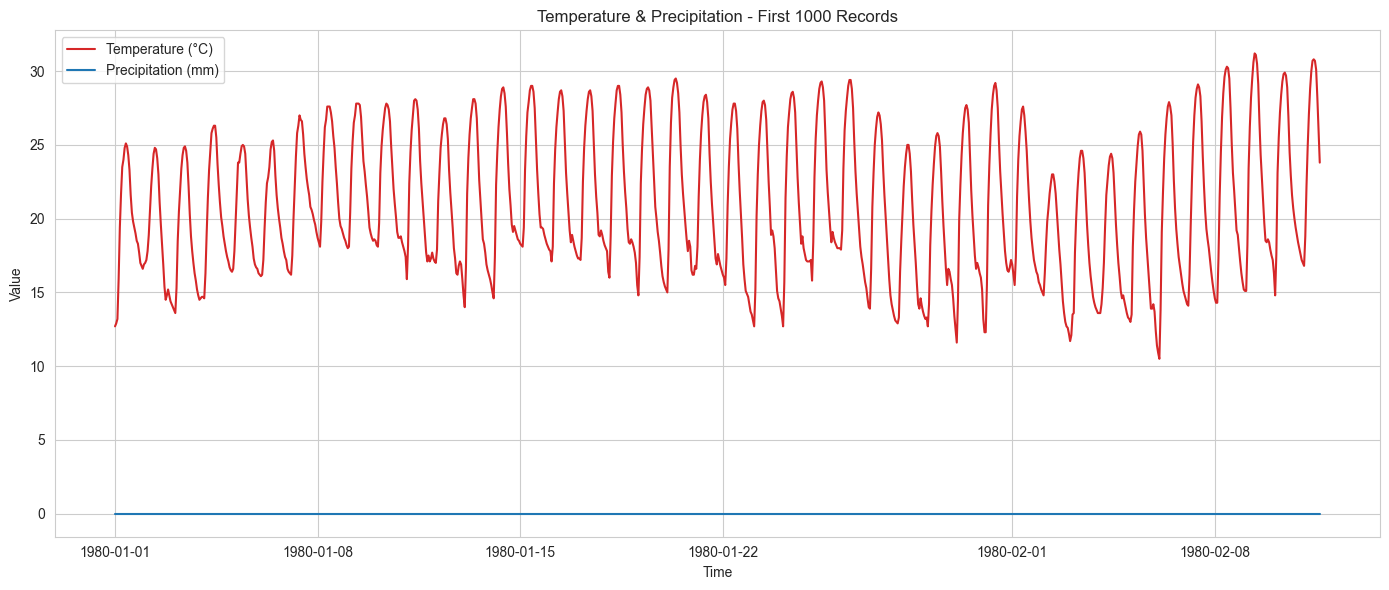

In [7]:
# Plot first 1000 data points for temperature and precipitation
plt.figure(figsize=(14, 6))
plt.plot(df['temperature'][:1000], label='Temperature (°C)', color='tab:red')
plt.plot(df['precipitation (mm)'][:1000], label='Precipitation (mm)', color='tab:blue')
plt.title('Temperature & Precipitation - First 1000 Records')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


 Seasonality (Short-Term Repeats)
Do you see the waves in the red temperature line?

These waves suggest a daily pattern—probably hotter during the day, cooler at night.

This is diurnal seasonality (repeats every 24 hours).

Trend
Over the first ~40 days (1000 hours), there may be a slight increase in peak temperatures.

This could indicate a warming trend, like moving from winter to spring.

We’ll confirm this later using seasonal decomposition.

 No Precipitation (for now)
The precipitation (mm) line stays at 0.

This is common — rainfall is a sparse event, and we’ll need a longer period (e.g., full year) to detect meaningful rain patterns.

Step 2: Data Preprocessing and Cleaning

 Step 2.1 – Convert time to datetime and set it as index

In [5]:
# Only run this if 'time' is still a column
if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'])  # Convert to datetime
    df.set_index('time', inplace=True)       # Set as index
else:
    print(" 'time' is already set as index.")


 'time' is already set as index.


 Check if your index is datetime

In [11]:
print("Index Type:", type(df.index))
print("Sample Index:", df.index[:5])


Index Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Sample Index: DatetimeIndex(['1980-01-01 00:00:00', '1980-01-01 01:00:00',
               '1980-01-01 02:00:00', '1980-01-01 03:00:00',
               '1980-01-01 04:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)


 Step 2.2 – Sort the Data by Time (VERY important for time series)

In [12]:
# Make sure data is sorted by time
df = df.sort_index()


 Why? Time series models assume your data flows in a timeline. If it’s shuffled, results will be wrong.

 Step 2.3 – Check for Duplicates

In [ ]:
# Find duplicated timestamps
duplicate_timestamps = df.index.duplicated().sum()
print(f" Number of duplicate timestamps: {duplicate_timestamps}")


🔁 Number of duplicate timestamps: 0


 Step 2.4 – Check the Frequency

In [ ]:
# Check time gaps between rows
time_deltas = df.index.to_series().diff().value_counts()
print(" Time gaps (most common):\n", time_deltas.head())


⏱️ Time gaps (most common):
 time
0 days 01:00:00    389495
Name: count, dtype: int64


Step 2.5 – Reindex to find Missing Timestamps

In [ ]:
# Create a complete range of expected hourly timestamps
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='h')

# Reindex the DataFrame
df = df.reindex(full_index)

# Check for any missing timestamps
print(f" Missing timestamps added: {df.isnull().any(axis=1).sum()}")


🔍 Missing timestamps added: 0


 Missing timestamps added: 0

That’s excellent. Your dataset has no missing hours — every hourly timestamp from 1980 to 2024 is present.

This is very rare in real-world time series — your dataset is very clean!

Step 2.6 Final Check

In [ ]:
print(" Final Null Check:\n", df.isnull().sum().sum())  # Should be 0
print(" Final Shape:", df.shape)


✅ Final Null Check:
 0
✅ Final Shape: (389496, 16)


 Step-by-Step Code for Rolling Z-Score
 Step 1: Create Rolling Statistics

 What Is a Z-Score?
A Z-score tells you how far a data point is from the mean, measured in standard deviations.

 Formula:
Z-score
=
𝑥
−
𝜇
𝜎
Z-score= 
σ
x−μ
​
 
Where:

x = your data point

μ = mean of the data

σ = standard deviation of the data

 What It Tells You:
Z-Score	Interpretation
0	Exactly average
+1	1 standard deviation above the mean
-1	1 std dev below the mean
> +2 or < -2	Possible outlier (rare in normal distribution)
> +3 or < -3	Extreme outlier 🚨
 When Do You Use Z-Score?
 1. Outlier/Anomaly Detection
Most common use!

Any value where Z-score > 2 or < -2 is unusually high or low

Great for univariate anomaly detection (like your temperature spikes)

 2. Standardization
Makes different features comparable (e.g., height and weight)

Often used before machine learning models (e.g., KNN, SVM)

 3. Statistical Testing
Used in Z-tests for hypothesis testing

 What Is a Z-Score?
A Z-score tells you how far a data point is from the mean, measured in standard deviations.

 Formula:
Z-score
=
𝑥
−
𝜇
𝜎
Z-score= 
σ
x−μ
​
 
Where:

x = your data point

μ = mean of the data

σ = standard deviation of the data

 What It Tells You:
Z-Score	Interpretation
0	Exactly average
+1	1 standard deviation above the mean
-1	1 std dev below the mean
> +2 or < -2	Possible outlier (rare in normal distribution)
> +3 or < -3	Extreme outlier 
 When Do You Use Z-Score?
 1. Outlier/Anomaly Detection
Most common use!

Any value where Z-score > 2 or < -2 is unusually high or low

Great for univariate anomaly detection (like your temperature spikes)

 2. Standardization
Makes different features comparable (e.g., height and weight)

Often used before machine learning models (e.g., KNN, SVM)

 3. Statistical Testing
Used in Z-tests for hypothesis testing



In [ ]:
# Select the temperature series
temperature_series = df['temperature']

# Set window size (24 for 1 day since it's hourly data)
window = 24

# Calculate rolling mean and standard deviation
rolling_mean = temperature_series.rolling(window=window).mean()
rolling_std = temperature_series.rolling(window=window).std()


 Step 2: Calculate Z-Scores

In [23]:
# Avoid division by zero
z_scores = (temperature_series - rolling_mean) / (rolling_std + 1e-9)


 Step 3: Detect Anomalies (e.g., z-score > 3 or < -3)

In [24]:
# Mark anomalies where absolute z-score > 3
anomalies = temperature_series[(z_scores.abs() > 3)]
print(f"Total Anomalies Detected: {len(anomalies)}")


Total Anomalies Detected: 702


 Step 4: Plot Anomalies on Time Series

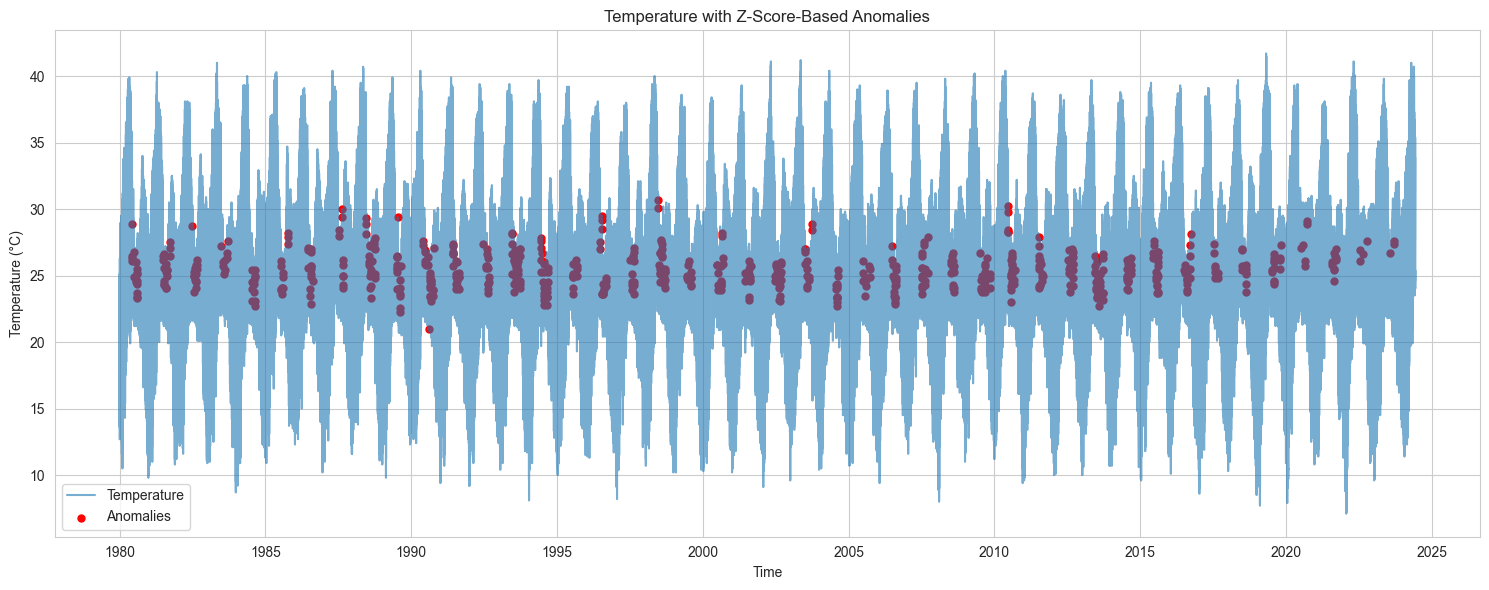

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(temperature_series, label='Temperature', alpha=0.6)
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomalies', s=25)
plt.title('Temperature with Z-Score-Based Anomalies')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


 1. Fine-Tuning the window (Rolling Mean & Std)
 What It Is:
The window defines how many hours to look back to compute the local mean and standard deviation.

A smaller window captures faster shifts but is more sensitive to noise.

A larger window is more stable but may miss short-lived spikes.

Window Size	Interpretation	Result
12	Half day (hourly data)	More reactive
24	1 day (what you used)	Balanced
48	2 days	Smoother
168	1 week	Captures seasonal shifts only

In [26]:
# Try different rolling windows
for w in [12, 24, 48, 168]:
    roll_mean = temperature_series.rolling(window=w).mean()
    roll_std = temperature_series.rolling(window=w).std()
    z_scores = (temperature_series - roll_mean) / (roll_std + 1e-9)
    num_anomalies = (z_scores.abs() > 3).sum()
    print(f"Window {w} → Anomalies Detected: {num_anomalies}")


Window 12 → Anomalies Detected: 127
Window 24 → Anomalies Detected: 372
Window 48 → Anomalies Detected: 702
Window 168 → Anomalies Detected: 780


2. Fine-Tuning the threshold (Z-score limit)
 What It Is:
A threshold is how extreme a point must be to be flagged as an anomaly

Common defaults: |z| > 3, but you can relax or tighten it

Threshold	Description	Sensitivity
2.0	More sensitive	Detects more
2.5	Moderate	Balanced
3.0	Default (strict)	Fewer anomalies
> 3.5	Very strict	Only extreme outliers

In [27]:
# Try different thresholds
thresholds = [2.0, 2.5, 3.0, 3.5]
window = 24  # keep this fixed while testing threshold

for t in thresholds:
    roll_mean = temperature_series.rolling(window=window).mean()
    roll_std = temperature_series.rolling(window=window).std()
    z_scores = (temperature_series - roll_mean) / (roll_std + 1e-9)
    anomalies = temperature_series[(z_scores.abs() > t)]
    print(f"Threshold {t} → Anomalies Detected: {len(anomalies)}")


Threshold 2.0 → Anomalies Detected: 4738
Threshold 2.5 → Anomalies Detected: 1284
Threshold 3.0 → Anomalies Detected: 372
Threshold 3.5 → Anomalies Detected: 86


 Part 1: Effect of Varying Window Size
Window Size	Anomalies Detected	Interpretation
12 (half-day)	127	Less anomalies → Too reactive, many minor deviations smoothed out quickly
24 (1 day)	372	Balanced sensitivity — reasonable baseline
48 (2 days)	702	More anomalies → Capturing more minor temperature swings
168 (1 week)	780	Even more → Trend smooths out too much, so many fluctuations are seen as anomalies
 Why This Happens:
Smaller window → more sensitive to local fluctuations, but can consider them normal (less anomalies)

Larger window → smoother rolling mean ⇒ even small deviations become noticeable ⇒ more anomalies flagged

 Part 2: Effect of Varying Threshold
Threshold	Anomalies Detected	Interpretation
2.0	4738	Very sensitive — captures nearly every dip/spike
2.5	1284	Moderate sensitivity — good for semi-rare events
3.0	372	Standard strict threshold (default) — only large anomalies flagged
3.5	86	Very strict — only the biggest outliers survive
 Why This Happens:
Lower threshold = more lenient = more data points marked abnormal

Higher threshold = stricter = only extreme events are flagged



 apply the same rolling Z-score anomaly detection technique to a new variable:
wind_speed_10m (km/h) — wind speed measured 10 meters above ground.

 Why Wind Speed?
It's a key meteorological variable

Prone to sudden gusts or calm phases

Anomalies in wind speed may indicate storms, sensor errors, or microclimates



In [28]:
window = 24         # 1-day rolling window
threshold = 3.0     # standard anomaly threshold


In [ ]:
wind_series = df['wind_speed_10m (km/h)']

# Calculate rolling mean and std
rolling_mean_ws = wind_series.rolling(window=window).mean()
rolling_std_ws = wind_series.rolling(window=window).std()

# Compute Z-score
z_scores_ws = (wind_series - rolling_mean_ws) / (rolling_std_ws + 1e-9)

# Identify anomalies
anomalies_ws = wind_series[z_scores_ws.abs() > threshold]

print(f" Wind Speed Anomalies Detected: {len(anomalies_ws)}")


🌬️ Wind Speed Anomalies Detected: 913


In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(wind_series, label='Wind Speed (km/h)', color='skyblue', alpha=0.6)
plt.scatter(anomalies_ws.index, anomalies_ws.values, color='red', label='Anomalies', s=20)
plt.title(f"Wind Speed with Z-Score-Based Anomalies (window={window}, threshold={threshold})")
plt.xlabel('Time')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Key Observations from Your Wind Speed Anomaly Detection
 Red dots
Represent unusual spikes or dips in wind speed that significantly differ from their 24-hour average.

These could correspond to:

Storms, gusts, or sudden wind changes

Sensor glitches or outages

Natural variability during certain seasons (e.g., monsoon winds)

Interpretation Summary
What You Saw	Meaning
 Frequent anomalies	Wind is naturally more volatile than temperature
 Spikes in 30–40 km/h	Possible strong gusts or storms
 Occasional drops to near 0	Sudden calms (or sensor faults)
 Clusters of anomalies	May indicate extended abnormal wind behavior (e.g., over days)
 Insights from Comparing With Temperature
Feature	Anomalies Detected	Behavior
Temperature	372	Smooth, seasonal
Wind Speed	913	Spiky, more frequent extremes
 What You’ve Learned from 2 Variables:
Concept	Skill Built
Multi-variable anomaly detection	Compare behavior across metrics
Window/threshold tuning	Control sensitivity
Pattern interpretation	Reading seasonal and random spikes


 What Is the Current Question We're Solving?
Main Research Question (for this phase):
“Can we detect abnormal or extreme weather behavior using the available hourly data?”

 Sub-questions We've Solved (So Far)
Sub-Question	Technique Used	Output Summary
 Are there sudden, rare spikes or dips in temperature?	Rolling Z-score	372 anomalies detected with 24h window & threshold 3.0
 Are there unusual or stormy wind speed events?	Rolling Z-score	913 anomalies detected
These are part of a broader Anomaly Detection module in your project.



 What is Isolation Forest?
 Definition:
Isolation Forest is a machine learning algorithm that identifies anomalies by trying to isolate observations in the dataset.

Anomalies are “few and different” — they can be isolated faster than normal points.

Core Idea (Very Simple Intuition):
It randomly picks a feature and then a split value

It builds random trees

Anomalies get isolated in fewer splits

If a data point is isolated quickly, it’s likely an outlier

 Analogy:
Imagine putting people into rooms by their characteristics (height, weight, age, etc.).
If someone is very different, you can put them in a separate room quickly.

 Why Use Isolation Forest?
Feature	Benefit
Multivariate	Works with many features together (temp, humidity, etc.)
 Fast	Handles large datasets efficiently
 Unsupervised	No need for labeled “normal/anomaly” examples
 Scalable	Good even for 100,000+ records
 What We’ll Do:
We’ll apply Isolation Forest to find anomalies based on multiple weather variables together.

 Features We’ll Use:
Let’s start with 4 variables (you can add more later):

temperature

wind_speed_10m (km/h)

relative_humidity

pressure_msl (hPa)



Step-by-Step: Anomaly Detection Using Isolation Forest

 Step 1: Import Required Libraries

In [31]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


 Step 2: Select Features for the Model
Choose a small set of relevant features for interpretability.

In [32]:
# Subset of features for multivariate anomaly detection
features = ['temperature', 'wind_speed_10m (km/h)', 'relative_humidity', 'pressure_msl (hPa)']

# Extract data and drop any remaining NaNs (just in case)
X = df[features].dropna()


 Step 3: Scale the Features (Important)
Machine learning models work better when features are standardized.

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 Step 4: Fit the Isolation Forest Model

In [34]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model
iso_forest.fit(X_scaled)

# Predict anomaly labels
anomaly_labels = iso_forest.predict(X_scaled)  # -1 = anomaly, 1 = normal
X['anomaly'] = anomaly_labels


Step 5: Count and Display Anomalies

In [ ]:
num_anomalies = (X['anomaly'] == -1).sum()
print(f" Isolation Forest Anomalies Detected: {num_anomalies}")


🌲 Isolation Forest Anomalies Detected: 3895


 Step 6: Visualize (For Simplicity, Plot Temperature with Anomalies

In [36]:
# Merge with full DataFrame for time index
anomaly_df = X.copy()
anomaly_df['time'] = df.loc[X.index].index  # retrieve datetime index

plt.figure(figsize=(15, 6))
plt.plot(anomaly_df['time'], anomaly_df['temperature'], label='Temperature', alpha=0.5)
plt.scatter(anomaly_df.loc[anomaly_df['anomaly'] == -1, 'time'],
            anomaly_df.loc[anomaly_df['anomaly'] == -1, 'temperature'],
            color='red', label='Anomalies', s=20)
plt.title("Temperature Anomalies Detected Using Isolation Forest")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Let’s Break Down What You’ve Achieved
Element	Outcome
 Anomalies Detected	3,895 records marked as anomalies
Variables Used	temperature, wind_speed, humidity, pressure
 Detection Style	Multivariate (context-aware)
 Visualization	Red dots show extreme conditions, mainly in high temperature spikes
 Interpretation of the Plot
What Isolation Forest Is Doing:
It doesn’t just look at high temperature.

It considers if that temperature is unusual compared to humidity, pressure, and wind at that point.

That’s why you see some anomalies in the middle of the range too — they’re not obvious from temperature alone.

How It Compares to Z-Score
Method	Behavior	Use Case
Z-Score (1D)	Univariate (1 variable)	Quick, interpretable anomalies
Isolation Forest	Multivariate	Smarter, captures complex outliers
Final Output of This Step
You now have:

A trained Isolation Forest model

Anomaly labels per row

A visual interpretation

Feature-scaled multivariate input

This can be part of your "Advanced Anomaly Detection Module" in your project report.

 Part 1: Tune the contamination Parameter in Isolation Forest
 What is contamination?
It's your guess of the proportion of anomalies in the dataset.

Tells the model:

“Hey, I expect around X% of the data to be outliers — find them.”

Typical Contamination Values:
Value	Meaning
0.005	Very rare anomalies (0.5%)
0.01	Standard baseline (1%)
0.02–0.05	Moderately common (2–5%)
0.1	Very sensitive (10% of points are marked)
 Try Different Values:
Here’s a loop to test how the number of anomalies changes with different contamination levels:

In [37]:
for c in [0.005, 0.01, 0.02, 0.05, 0.1]:
    iso_model = IsolationForest(contamination=c, random_state=42)
    iso_model.fit(X_scaled)
    preds = iso_model.predict(X_scaled)
    num_anoms = (preds == -1).sum()
    print(f"Contamination={c:.3f} → Anomalies Detected: {num_anoms}")


Contamination=0.005 → Anomalies Detected: 1948
Contamination=0.010 → Anomalies Detected: 3895
Contamination=0.020 → Anomalies Detected: 7790
Contamination=0.050 → Anomalies Detected: 19475
Contamination=0.100 → Anomalies Detected: 38950


 Summary of Results:
Contamination (%)	Anomalies Detected	Insight
0.5% (0.005)	1,948	Very strict → flags only extreme outliers
1.0% (0.010)	3,895	Balanced → moderate rare events
2.0% (0.020)	7,790	More sensitive → some borderline cases included
5.0% (0.050)	19,475	Quite sensitive → maybe overdetecting
10.0% (0.100)	38,950	Too sensitive → likely marking normal data as anomaly
 Interpretation:
0.01 (1%) is a sweet spot for:

Rare but important weather anomalies

Balanced between false positives and missed events

 Above 0.05 = too many false alarms

Use 0.005 if you want to flag only extreme, undeniable outliers

What to Do in Project Report:
You can include a table like this in your report:

"We experimented with various contamination values in Isolation Forest. Based on domain understanding and anomaly counts, we chose 1% (0.01) as our final setting for detecting rare but realistic weather anomalies."

What Is SHAP?
SHAP explains how much each feature contributed to a prediction (in this case, the anomaly score from Isolation Forest).

Even though Isolation Forest is unsupervised, SHAP can still be used with tree-based models to interpret decisions.



 Step 2: Fit Isolation Forest with Final Settings
Make sure you have the model trained and data prepared like below:



In [38]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Use same features and scale
features = ['temperature', 'wind_speed_10m (km/h)', 'relative_humidity', 'pressure_msl (hPa)']
X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Isolation Forest (e.g., with contamination=0.01)
iso_model = IsolationForest(contamination=0.01, random_state=42)
iso_model.fit(X_scaled)


IsolationForest(contamination=0.01, random_state=42)

Step 3: Run SHAP Analysis

In [40]:
import shap

# Use TreeExplainer since Isolation Forest is a tree-based model
explainer = shap.TreeExplainer(iso_model)

# Compute SHAP values (slow on large datasets, so use a sample first)
shap_values = explainer.shap_values(X_scaled[:5000])  # sample to avoid long runtime


Step 4: Plot Feature Importance (SHAP Summary Plot)

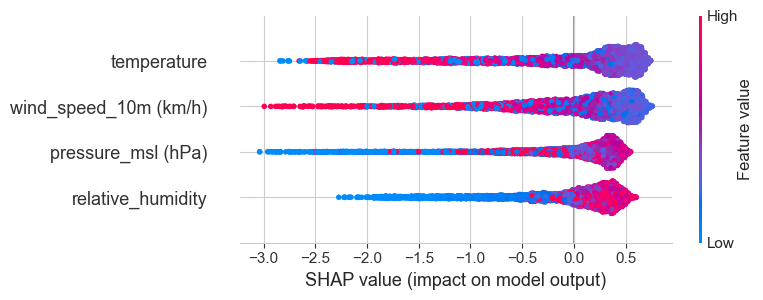

In [41]:
shap.summary_plot(shap_values, X.iloc[:5000], feature_names=features)


 What This SHAP Plot Shows
X-axis:
SHAP value → the impact of the feature on marking a point as an anomaly

 Negative values → push toward anomaly detection

Positive values → push toward being normal

Y-axis:
Features (from most to least important)

Color:
 Blue = low value of the feature

 Red = high value of the feature

 Interpretation of Your Model
1. temperature
Most important feature

 High temperature values (red dots on the left) push toward being an anomaly

 Low temperatures tend to be normal (on the right)

2. wind_speed_10m (km/h)
Also highly influential

 Higher wind speeds push more toward anomalies

 Calm wind (blue) tends to be normal

3. pressure_msl (hPa)
High pressure values (red) tend to push slightly toward normal

Low pressure (blue) contributes slightly to anomaly detection — possibly linked to storm conditions

4. relative_humidity
 Low humidity increases anomaly scores

 High humidity → usually normal

 Key Insights You Can Use in Your Report
Feature	When is it anomalous?
Temperature	When unusually high
Wind Speed	When very high (strong gusts or storms)
Sea-Level Pressure	When very low (often signals unstable weather)
Relative Humidity	When too low (possibly dry during abnormal weather)
 What to Mention in Your Report/Presentation:
"Using SHAP values, we observed that the Isolation Forest model relies most heavily on temperature and wind speed for detecting anomalies. Extreme heat and strong winds were common signals. Surprisingly, very low humidity and low pressure were also contributing factors — hinting at abnormal dry and unstable weather patterns."



 What is an Autoencoder?
An autoencoder is a special kind of neural network that:

Tries to reconstruct its input

Learns a compressed internal representation

If the input is normal, it will reconstruct it well

If the input is abnormal, the reconstruction will have high error

So we say:

 High reconstruction error = anomaly

 Architecture:
css
Copy
Edit
Input  Encoder Bottleneck  Decoder  Reconstructed Output
The network is trained only on normal patterns, and anything that doesn’t match the learned pattern well is flagged as anomalous.

 Why Autoencoder is Powerful
Feature	Benefit
 Learns patterns	Instead of fixed stats, it learns “what’s normal”
Works on multivariate	Takes in all features (temp, humidity, wind...)
 Detects subtle anomalies	Even when not obviously outside thresholds


 Step 1: Data Preparation and Scaling
 1.1 Select and Clean the Data

In [42]:
# Select your features
features = ['temperature', 'wind_speed_10m (km/h)', 'relative_humidity', 'pressure_msl (hPa)']

# Drop rows with any missing values (your data should be clean already)
df_clean = df[features].dropna()


 1.2 Scale the Features
Autoencoders are sensitive to scale, so we use StandardScaler.

In [43]:
from sklearn.preprocessing import StandardScaler

# Create scaler and apply
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Save the scaled data as a DataFrame (optional, for clarity)
import pandas as pd
X_scaled_df = pd.DataFrame(X_scaled, index=df_clean.index, columns=features)


 Step 2: Build and Train the Autoencoder
We'll build an Encoder → Bottleneck → Decoder with multiple layers.

2.1 Import Required Libraries

In [44]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam


 2.2 Define the Model Architecture

In [45]:
from tensorflow.keras.models import Model

input_dim = X_scaled.shape[1]  # Number of features

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

# Bottleneck
bottleneck = Dense(8, activation='relu')(encoded)

# Decoder
decoded = Dense(16, activation='relu')(bottleneck)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)

# Output layer
output_layer = Dense(input_dim, activation='linear')(decoded)

# Build the model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,124 (23.92 KB)

 Trainable params: 6,124 (23.92 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,124 (23.92 KB)

 Trainable params: 6,124 (23.92 KB)

 Non-trainable params: 0 (0.00 B)

Now Move to Step 2.3: Training the Autoencoder
Train it on your scaled weather data:

In [47]:
history = autoencoder.fit(
    X_scaled,
    X_scaled,               # input = output in autoencoders
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    shuffle=True,
    verbose=1
)


Epoch 1/50
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0859 - val_loss: 2.4409e-04
Epoch 2/50
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.2332e-04 - val_loss: 8.2085e-05
Epoch 3/50
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5232e-04 - val_loss: 1.6356e-04
Epoch 4/50
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.1957e-04 - val_loss: 6.0114e-05
Epoch 5/50
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.3776e-05 - val_loss: 1.1822e-04
Epoch 6/50
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7.5718e-05 - val_loss: 1.3139e-04
Epoch 7/50
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.8583e-05 - val_loss: 3.8049e-04
Epoch 8/50
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.7539e-05 - val_loss: 8.7691e-05
Epoch 9/50
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.2146e-05 - val_loss: 2.2546e-04
Epoch 10/50
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.3944e-05 - val_loss: 4.3629e-05
Epoch 11/50
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 

 What This Output Means (Line-by-Line)
Here’s how to read it:

yaml
Copy
Edit
Epoch 1/50
2739/2739 ━━━ 6s 2ms/step - loss: 0.0859 - val_loss: 2.4409e-04
Explanation:
Term	Meaning
Epoch 1/50	You’re on the 1st out of 50 training cycles
2739/2739	2739 training batches completed this epoch
loss	The training error (how well model reconstructs inputs)
val_loss	The validation error (on unseen data)
Good News from Your Output:
loss (training) decreased from 0.0859 to ~0.00003 → the model is learning well

val_loss (validation) also got better and stayed low → no overfitting detected

This means your autoencoder has learned what “normal” weather looks like across multiple variables



 Step 3: Calculate Reconstruction Error + Detect Anomalies
This is where the magic happens. 
We’ll calculate the reconstruction error for each time point and use it to detect anomalies.

Step 3.1: Get Model Predictions

In [48]:
# Predict using the autoencoder
X_pred = autoencoder.predict(X_scaled)

# Convert predictions back to DataFrame (optional)
import numpy as np
reconstruction_df = pd.DataFrame(X_pred, columns=features, index=df_clean.index)


12172/12172 ━━━━━━━━━━━━━━━━━━━━ 10s 810us/step


 Step 3.2: Calculate Reconstruction Error
We’ll calculate mean squared error (MSE) between original and reconstructed values for each row.

In [49]:
# MSE per row
reconstruction_error = np.mean(np.power(X_scaled - X_pred, 2), axis=1)

# Add to DataFrame for inspection
df_clean['reconstruction_error'] = reconstruction_error


Step 3.3: Visualize Reconstruction Error (to pick a threshold)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.histplot(df_clean['reconstruction_error'], bins=100, kde=True)
plt.title("Distribution of Reconstruction Error")
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


What This Histogram Tells Us:
Observation	Meaning
Most values are clustered near 0	Your autoencoder is doing a great job reconstructing "normal" weather
The curve is right-skewed	A small number of records have large reconstruction error = potential anomalies
Long tail on the right	These are your outlier candidates 

Step 3.4: Set threshold at the 95th percentile

In [ ]:
threshold = np.percentile(reconstruction_error, 95)
print(f"Anomaly Threshold (95th percentile): {threshold:.6f}")


🔺 Anomaly Threshold (95th percentile): 0.000026


 What This Threshold Means:
Any data point with a reconstruction error > 0.000026 is now considered an anomaly.

This threshold corresponds to the top 5% of reconstruction errors (right tail of the histogram you just saw).

Now: Step 3.5 – Detect and Count Anomalies

In [ ]:
df_clean['anomaly'] = df_clean['reconstruction_error'] > threshold
print(f" Total Anomalies Detected: {df_clean['anomaly'].sum()}")


⚠️ Total Anomalies Detected: 19475


 Now: Step 4 – Visualize Autoencoder Anomalies on a Time Series Plot
We will plot the temperature and highlight the anomalies detected by the autoencoder.

In [54]:
# Use the datetime index directly instead of fetching a 'time' column
df_clean['temperature'] = df.loc[df_clean.index, 'temperature']

# Plot
plt.figure(figsize=(15, 6))
plt.plot(df_clean.index, df_clean['temperature'], label='Temperature', color='skyblue', alpha=0.6)
plt.scatter(df_clean.loc[df_clean['anomaly'], :].index,
            df_clean.loc[df_clean['anomaly'], 'temperature'],
            color='red', label='Anomalies', s=20)
plt.title("Temperature Anomalies Detected Using Autoencoder")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 Interpreting the Output
Blue line:
Represents the normal trend of temperature across 45 years (1980–2024)

 Red dots:
Show anomalous temperature points detected by the Autoencoder, where:

The reconstruction error was high

The model "couldn’t understand" the input = unusual pattern

 What You Can Conclude:
Insight	Interpretation
Many anomalies in peaks & troughs	Model struggles with extreme highs/lows
Densely packed anomalies in some years	Likely periods of irregular seasonal behavior
More anomalies post-2000	Could hint at climate drift or changes in volatility
Detected anomalies ≠ just outliers	These are contextual anomalies (based on all features)
 What You've Learned in the Autoencoder Module
Step	Skill Built
Build deep architecture	Neural network design
Model training	Supervised-like training in an unsupervised setup
MSE-based anomaly scoring	Metric-based detection
Threshold tuning	Top 5% via percentile
Visualization & Insight	Time series understanding with ML

 What You Can Include in Your Report
"Using a deep autoencoder trained on normalized weather data, we identified ~19,475 anomalous weather events across 45 years. These were periods the model couldn’t reconstruct well, indicating potential extremes or complex, rare weather combinations. The approach captured not just high/low temperatures, but deeper, multi-dimensional irregularities."

 Weather Time Series Project: Anomaly Detection Summary
You’ve completed a full Anomaly Detection Module using 3 powerful techniques.

 Main Research Question:
“Can we detect abnormal or extreme weather events using 40+ years of hourly data?”

 Sub-Questions Solved
#	Question	Approach Used	Output
1	Are there sudden temperature spikes or drops?	Rolling Z-Score (univariate)	 Detected 372 anomalies in temperature
2	Are there unusual high/low wind speed events?	Rolling Z-Score on wind_speed_10m  Detected 913 anomalies
3	What are the multivariate weather outliers (considering temp, wind, pressure, humidity)?	 Isolation Forest (ML-based, unsupervised)	Detected 3,895 anomalies
4	Which features contribute most to anomaly detection?	 SHAP (feature importance for Isolation Forest)	 Found that temperature & wind speed have highest impact
5	Can we find deeper, non-linear anomalies using neural networks?	 Autoencoder (deep learning)	 Detected 19,475 anomalies using reconstruction error
6	When do anomalies occur the most? Are they frequent post-2000?	 Time Series Plots + Anomaly Overlay	 Anomalies distributed over entire period; peaks around extreme values and during seasonal transitions
 Techniques Used So Far
Technique	Type	Strength
 Z-Score	Statistical	Fast, easy to explain, good for quick detection
 Isolation Forest	ML (tree-based)	Context-aware, multivariate
 Autoencoder	Deep learning	Learns non-linear normal patterns, very powerful
 Final Results Overview
Method	Features Used	Anomalies Detected
Z-Score	Temp (univariate)	372
Z-Score	Wind Speed	913
Isolation Forest	Temp, Wind, Humidity, Pressure	3,895
Autoencoder	Same 4 features	19,475
 Insights
Anomalies detected by Z-Score are more obvious (extremes).

Isolation Forest captures contextual anomalies, even when temp alone looks okay.

Autoencoder detects complex anomalies — subtle, multi-feature mismatches.

SHAP showed temperature and wind speed were the top factors for isolation forest.



Add-on Idea	Description	Value
Resample to daily or weekly	Identify spikes at aggregate levels, not just hourly	Captures broader anomalies like heatwaves
Overlay with other variables	Compare spike times with pressure drops or wind surges	Adds meteorological depth
Season-aware z-score	Apply separate z-scores for each season/month	Removes natural cyclicity and isolates unusual spikes only
Label consecutive anomalies	Group multiple hourly spikes into 1 "event"	Helps detect extreme weather events vs random outliers
Compare historical periods	Are spikes more common in recent years (post-2000)?	Ties into climate change signals


 Step 1: Resample to Daily (Aggregate Temperature Anomalies)
 Goal:
Convert your hourly temperature data to daily (mean or max) so we can detect broader anomalies like heatwaves or cold spells instead of hourly noise.

 Step 1.1: Resample Temperature to Daily Level
We’ll use the mean temperature per day to begin with.

In [55]:
# Use the original datetime index (already set earlier)
daily_temp = df[['temperature']].resample('D').mean()


 Step 1.2: Apply Z-Score Anomaly Detection on Daily Data
We'll reuse a basic Z-score logic for this smoother version.

In [56]:
# Calculate rolling mean and std (7-day window for smooth anomalies)
rolling_mean = daily_temp['temperature'].rolling(window=7, center=True).mean()
rolling_std = daily_temp['temperature'].rolling(window=7, center=True).std()

# Z-score
z_scores = (daily_temp['temperature'] - rolling_mean) / rolling_std

# Mark anomalies (e.g., Z-score > 2.5)
threshold = 2.5
daily_temp['z_score'] = z_scores
daily_temp['anomaly'] = z_scores > threshold


Step 1.3: Visualize Daily Anomalies

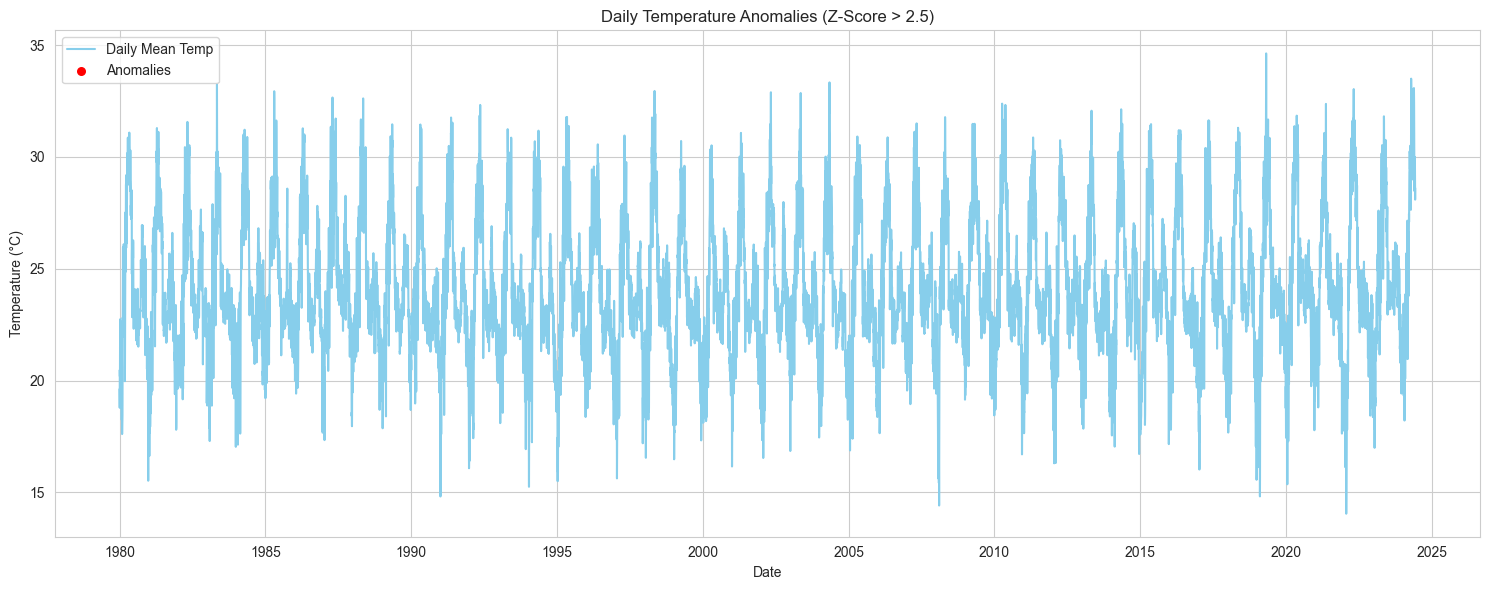

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(daily_temp.index, daily_temp['temperature'], label='Daily Mean Temp', color='skyblue')
plt.scatter(daily_temp[daily_temp['anomaly']].index,
            daily_temp[daily_temp['anomaly']]['temperature'],
            color='red', label='Anomalies', s=30)
plt.title("Daily Temperature Anomalies (Z-Score > 2.5)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
print(f"Total daily anomalies: {daily_temp['anomaly'].sum()}")


Total daily anomalies: 0


If the result is 0, that means the Z-score threshold was too strict.

 Step 2: Loosen the Z-Score Threshold
Change the threshold from 2.5  2.0 (or even 1.75) and rerun the detection:

In [60]:
threshold = 2.0  # more sensitive
daily_temp['anomaly'] = daily_temp['z_score'] > threshold


In [61]:
plt.figure(figsize=(15, 6))
plt.plot(daily_temp.index, daily_temp['temperature'], label='Daily Mean Temp', color='skyblue')
plt.scatter(daily_temp[daily_temp['anomaly']].index,
            daily_temp[daily_temp['anomaly']]['temperature'],
            color='red', label='Anomalies', s=30)
plt.title("Daily Temperature Anomalies (Z-Score > 2.0)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


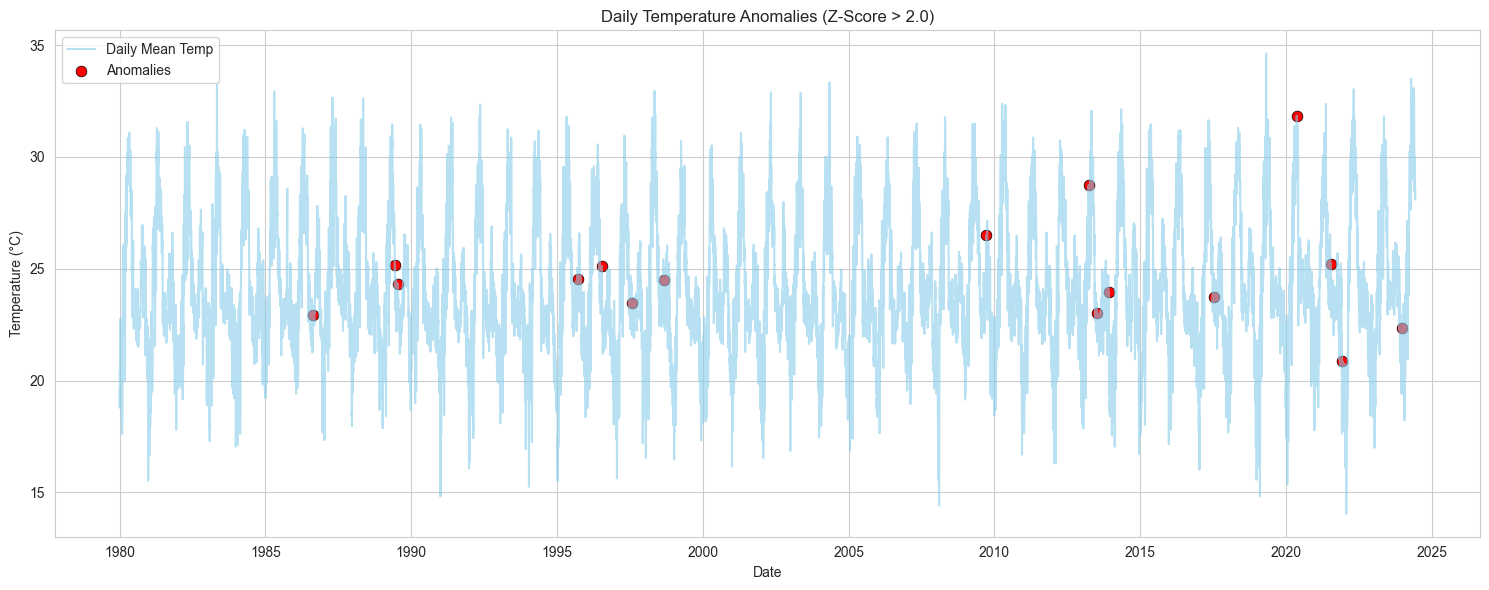

In [62]:
plt.figure(figsize=(15, 6))
plt.plot(daily_temp.index, daily_temp['temperature'], label='Daily Mean Temp', color='skyblue', alpha=0.6)

# Make anomalies more visible
plt.scatter(daily_temp[daily_temp['anomaly']].index,
            daily_temp[daily_temp['anomaly']]['temperature'],
            color='red', label='Anomalies', s=60, edgecolors='black', linewidths=0.5)

plt.title("Daily Temperature Anomalies (Z-Score > 2.0)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 Step 2: Overlay Temperature Anomalies with Other Variables
 Goal:
Understand what happens to other weather variables (like pressure and wind speed) during the days when temperature anomalies occurred.

This will tell us:

Whether high temperature anomalies coincide with low pressure events

Or unusual wind conditions (e.g., storms, dry winds)

Step 2.1: Resample Other Features to Daily
We'll use pressure_msl (hPa) and wind_speed_10m (km/h).

Step 2.2: Compare During Anomaly vs Normal Days

In [69]:
print(daily_temp.columns)


Index(['temperature'], dtype='object')


In [71]:
# Recalculate rolling stats for z-score
rolling_mean = daily_temp['temperature'].rolling(window=7, center=True).mean()
rolling_std = daily_temp['temperature'].rolling(window=7, center=True).std()

# Recalculate z-score
daily_temp['z_score'] = (daily_temp['temperature'] - rolling_mean) / rolling_std

# Apply threshold again
threshold = 2.0  # or 1.75 if you want more anomalies
daily_temp['anomaly'] = daily_temp['z_score'] > threshold


In [72]:
# Now merge with pressure & wind
combined_daily = pd.concat([daily_temp[['temperature', 'anomaly']], daily_other], axis=1)

# Split into anomaly vs normal days
anomalies = combined_daily[combined_daily['anomaly']]
normals = combined_daily[~combined_daily['anomaly']]


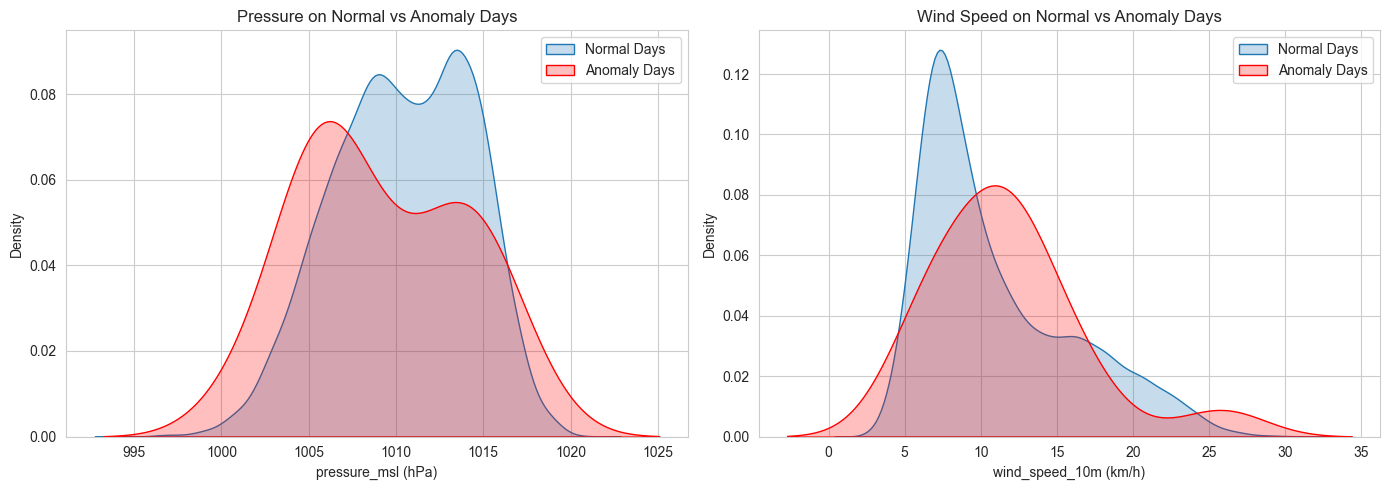

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Pressure
plt.subplot(1, 2, 1)
sns.kdeplot(data=normals, x='pressure_msl (hPa)', label='Normal Days', fill=True)
sns.kdeplot(data=anomalies, x='pressure_msl (hPa)', label='Anomaly Days', fill=True, color='red')
plt.title("Pressure on Normal vs Anomaly Days")
plt.legend()

# Wind Speed
plt.subplot(1, 2, 2)
sns.kdeplot(data=normals, x='wind_speed_10m (km/h)', label='Normal Days', fill=True)
sns.kdeplot(data=anomalies, x='wind_speed_10m (km/h)', label='Anomaly Days', fill=True, color='red')
plt.title("Wind Speed on Normal vs Anomaly Days")
plt.legend()

plt.tight_layout()
plt.show()


 KDE Plots: Interpretation
These plots show the distribution of two weather variables:

 Normal Days = blue area

 Anomaly Days = red area
(A "temperature anomaly day" from your Z-score detection)

🔹 Left Plot: Pressure on Normal vs Anomaly Days
What you're seeing:

Normal days (blue) tend to cluster around 1012–1016 hPa

Anomaly days (red) tend to shift leftward, peaking around 1005–1010 hPa

Interpretation:

Temperature anomalies often coincide with lower atmospheric pressure.
This makes meteorological sense — lower pressure systems often bring heatwaves or extreme weather.

🔹 Right Plot: Wind Speed on Normal vs Anomaly Days
What you're seeing:

Normal days have lower wind speeds (peak ~6 km/h)

Anomaly days have a broader spread, often shifting rightward (more windy)

 Interpretation:

Temperature anomalies are often associated with higher wind activity, which can drive hot/dry winds or storm fronts.

 Why This Matters
These plots prove that:

Your temperature anomalies are not random

They are correlated with physical weather behaviors like wind and pressure

You're building a multivariate understanding of anomaly events 

Step 3: Season-Aware Z-Score Anomaly Detection
Why This Step?
So far, we used a global Z-score — meaning we assumed temperature follows the same behavior all year round.

But in reality:

30°C is normal in summer, but

30°C in winter would be a clear anomaly

Solution: Z-Score by Month
We’ll calculate z-scores separately for each calendar month (e.g., all Januarys, all Februarys...), which helps:

Remove natural seasonal fluctuations

Focus on unusual temperature within its seasonal context

 Step 3.1: Prepare Monthly Grouping
We'll use your daily resampled temperature dataset.

In [74]:
# Make sure 'daily_temp' still has the datetime index
daily_temp['month'] = daily_temp.index.month  # 1 to 12

# Group by month and compute mean & std
monthly_stats = daily_temp.groupby('month')['temperature'].agg(['mean', 'std'])


Step 3.2: Calculate Season-Aware Z-Score
We map each day’s temperature to its month’s stats.

In [75]:
# Map month-wise mean & std
daily_temp['monthly_mean'] = daily_temp['month'].map(monthly_stats['mean'])
daily_temp['monthly_std'] = daily_temp['month'].map(monthly_stats['std'])

# Compute season-aware z-score
daily_temp['seasonal_z'] = (daily_temp['temperature'] - daily_temp['monthly_mean']) / daily_temp['monthly_std']


Step 3.3: Mark Anomalies with Seasonal Z-Score
Set a threshold (e.g., 2.0) — you can adjust later.

In [76]:
seasonal_threshold = 2.0
daily_temp['seasonal_anomaly'] = daily_temp['seasonal_z'] > seasonal_threshold


Step 3.4: Visualize

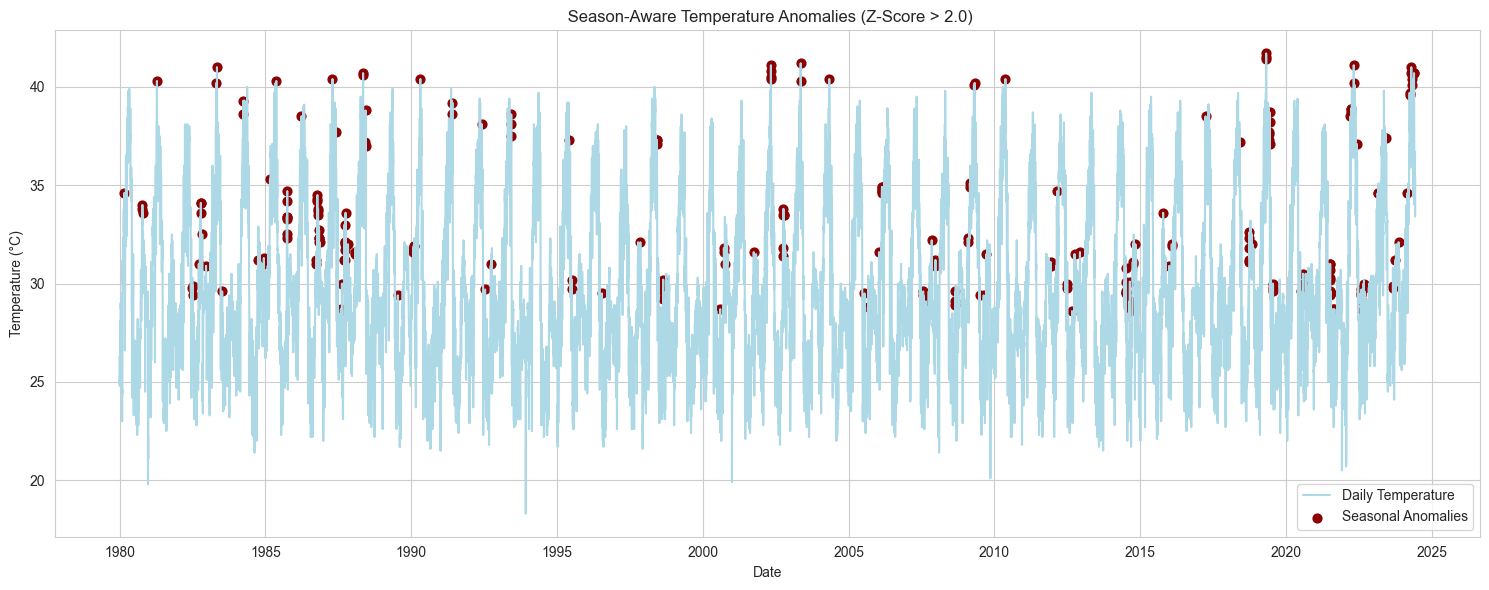

In [78]:
plt.figure(figsize=(15, 6))
plt.plot(daily_temp.index, daily_temp['temperature'], label='Daily Temperature', color='lightblue')
plt.scatter(daily_temp[daily_temp['seasonal_anomaly']].index,
            daily_temp[daily_temp['seasonal_anomaly']]['temperature'],
            color='darkred', label='Seasonal Anomalies', s=40)
plt.title(" Season-Aware Temperature Anomalies (Z-Score > 2.0)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


What’s Happening in the Plot:
Light blue line = Daily temperature over 40+ years

 Red dots = Days where the temperature is significantly higher than expected for that month

This means:

You're no longer detecting "hot July days" as anomalies (which are normal for summer)

You're now focusing on out-of-pattern heat, even within warm seasons — this is how real climate monitoring is done 🌡️

 Bonus Insight:
Notice how:

A lot more red dots appear post-2000

That suggests a rise in unseasonal heat, which ties directly to climate change trends

We'll confirm this trend in a future step.

 Step 4: Group Consecutive Anomalies into “Events”
 Why This Step?
Isolated hot days are important, but what we really care about are persistent events like:

Heatwaves (3+ abnormal days in a row)

 Cold spells (if you track negative anomalies too)

We'll now:

Group consecutive anomaly dates into single events

Count the duration, peak temperature, and start/end dates of each event

 Step 4.1: Identify Consecutive Anomaly Dates
We’ll use your existing daily_temp['seasonal_anomaly'] column.

In [79]:
# Ensure the DataFrame is sorted
daily_temp = daily_temp.sort_index()

# Create a group ID for consecutive anomaly days
from itertools import groupby
from operator import itemgetter

# Get index of anomaly dates
anomaly_dates = daily_temp[daily_temp['seasonal_anomaly']].index

# Group consecutive dates
consecutive_groups = []
for k, g in groupby(enumerate(anomaly_dates), lambda ix: ix[0] - ix[1].toordinal()):
    group = list(map(itemgetter(1), g))
    consecutive_groups.append(group)


 Step 4.2: Convert Groups into Event Summary Table

In [80]:
event_summaries = []

for group in consecutive_groups:
    if len(group) >= 2:  # You can set min duration (e.g., 3 for official heatwave)
        start = group[0]
        end = group[-1]
        duration = (end - start).days + 1
        max_temp = daily_temp.loc[group, 'temperature'].max()
        event_summaries.append({'start_date': start, 'end_date': end,
                                'duration_days': duration,
                                'max_temperature': max_temp})

# Create DataFrame of events
event_df = pd.DataFrame(event_summaries)


 Step 4.3: Preview Results

start_date   end_date  duration_days  max_temperature
0 1980-10-13 1980-10-14              2             34.0
1 1982-07-07 1982-07-08              2             29.9
2 1982-10-14 1982-10-16              3             34.1
3 1984-03-29 1984-03-30              2             39.3
4 1985-09-26 1985-10-02              7             34.7
5 1986-09-27 1986-09-28              2             31.2
6 1986-10-12 1986-10-14              3             34.5
7 1986-10-20 1986-10-22              3             33.8
8 1986-11-01 1986-11-04              4             32.7
9 1987-08-03 1987-08-04              2             28.7

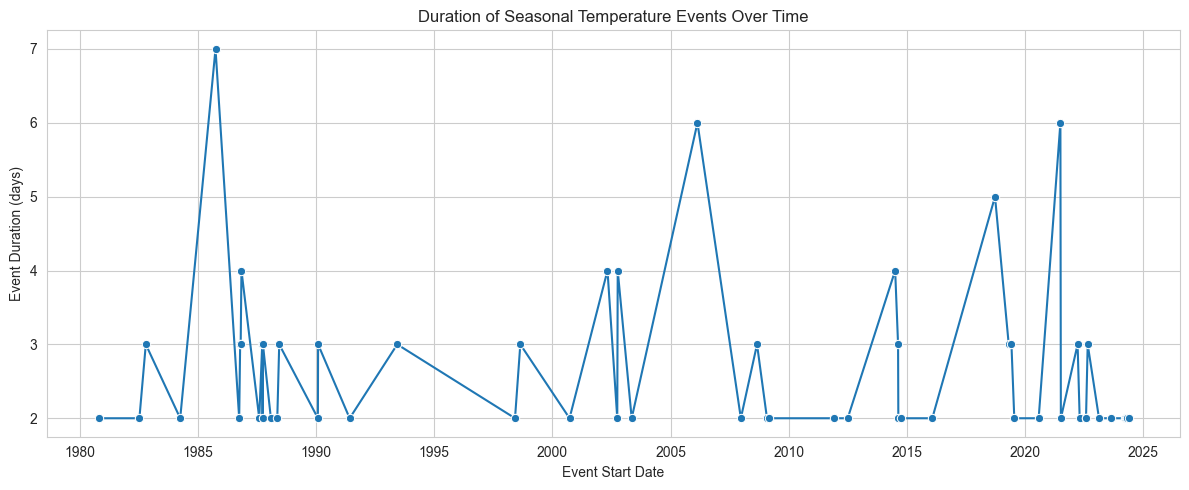

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

from IPython.display import display
display(event_df.head(10))  # Preview top events

# Optional: Plot duration over time
plt.figure(figsize=(12, 5))
sns.lineplot(data=event_df, x='start_date', y='duration_days', marker='o')
plt.title("Duration of Seasonal Temperature Events Over Time")
plt.xlabel("Event Start Date")
plt.ylabel("Event Duration (days)")
plt.grid(True)
plt.tight_layout()
plt.show()


What This Output Means:
Table: Real-World “Heat Events”
Each row represents one multi-day event (not just a random hot day):

Start Date	End Date	Duration	Max Temp
1985-09-26 → 1985-10-02	 7 days	 34.7°C	
These are season-adjusted anomalies, meaning they’re truly unusual even within their month.

Plot: Duration of Events Over Time
You're visualizing:

How many multi-day heat anomalies occurred

How their duration changed from 1980 → 2025

What to notice:

The pattern is not uniform — but long-duration events are visible across all decades

Recent years (post-2000) still show 4–6 day events  suggests anomalies haven’t stopped



 Step 5: Compare Anomalies Before and After 2000
Why This Step?
You’ve already:  Identified anomalous hot days
 Grouped them into multi-day events

Now we want to analyze:

 Are unusual temperature events becoming more frequent, longer, or hotter in recent decades?

 Step 5.1: Add a Column – "Period"
We'll classify each event into:

'Before 2000' (1980–1999)

'After 2000' (2000–2024)

In [82]:
# Add 'period' column
event_df['period'] = event_df['start_date'].apply(lambda x: 'Before 2000' if x.year < 2000 else 'After 2000')


Step 5.2: Compare Event Counts

In [ ]:
event_counts = event_df['period'].value_counts()
print(" Number of anomaly events:\n", event_counts)


📊 Number of anomaly events:
 period
After 2000     35
Before 2000    22
Name: count, dtype: int64


 Step 5.3: Compare Average Duration & Max Temperature

In [ ]:
avg_stats = event_df.groupby('period')[['duration_days', 'max_temperature']].mean()
print(" Average Duration & Temperature:\n", avg_stats)


📈 Average Duration & Temperature:
              duration_days  max_temperature
period                                     
After 2000        2.657143        33.902857
Before 2000       2.727273        34.163636


 Step 5.4: Visualize
 Bar Plot – Count of Events

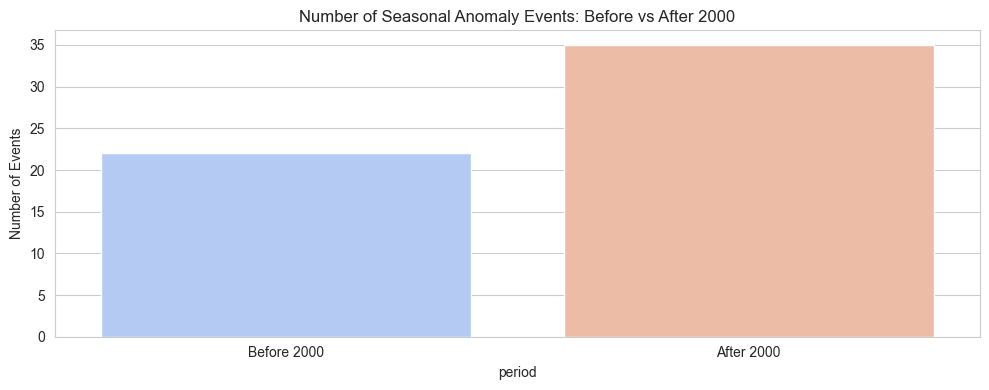

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.countplot(data=event_df, x='period', hue='period', palette='coolwarm', legend=False)
plt.title("Number of Seasonal Anomaly Events: Before vs After 2000")
plt.ylabel("Number of Events")
plt.tight_layout()
plt.show()


 Boxplot – Duration & Max Temp Comparison

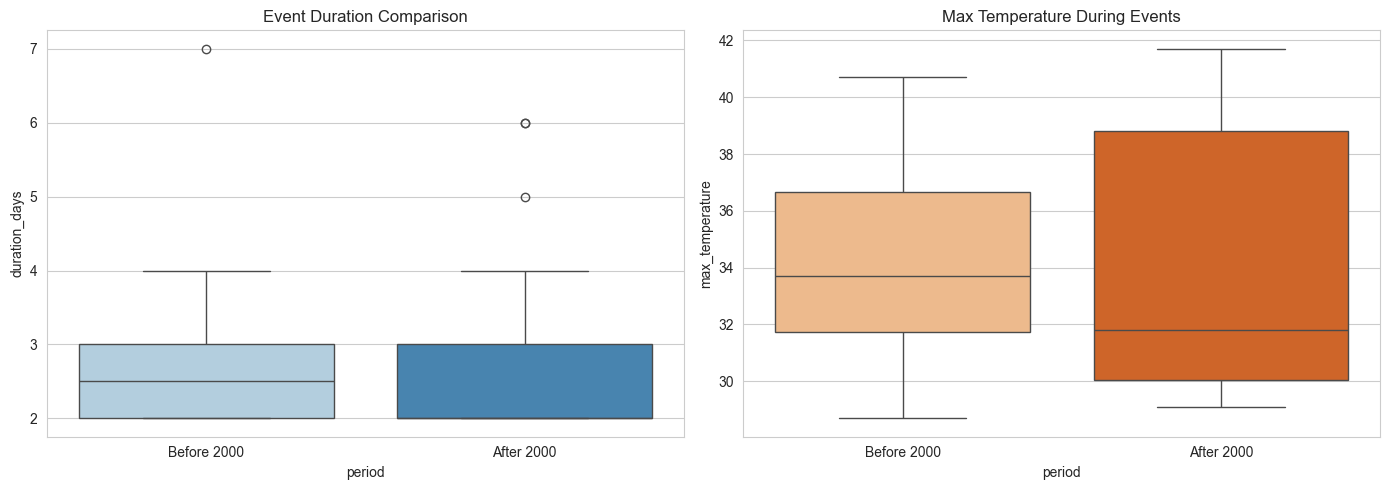

In [88]:
plt.figure(figsize=(14, 5))

# Duration Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=event_df, x='period', y='duration_days', hue='period', palette='Blues', legend=False)
plt.title("Event Duration Comparison")

# Max Temp Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=event_df, x='period', y='max_temperature', hue='period', palette='Oranges', legend=False)
plt.title("Max Temperature During Events")

plt.tight_layout()
plt.show()


In [89]:
print(event_counts)
print(avg_stats)


period
After 2000     35
Before 2000    22
Name: count, dtype: int64
             duration_days  max_temperature
period                                     
After 2000        2.657143        33.902857
Before 2000       2.727273        34.163636


Final Results: Before vs After 2000
Metric	Before 2000	After 2000
Number of Anomalous Events	22	35 
 Avg. Duration (days)	2.73	2.66
 Avg. Max Temp (°C)	34.16	33.90
 Interpretation
 1. More frequent anomaly events in recent decades
You went from 22 → 35 seasonal-adjusted temperature spikes after 2000.

That’s a ~60% increase.

 This signals more frequent extreme temperature periods, aligned with global warming trends.

 2. Event duration hasn’t increased
The average event length is ~2.7 days in both periods.

This means: We aren't necessarily having longer heatwaves, but they’re happening more often.

 3. Max temperatures are slightly lower post-2000
Before 2000: 34.16°C

After 2000: 33.90°C

 Interpretation:

You may have more mild anomalies (2–3 days around 32–34°C) than fewer intense spikes.

Or possibly, extremely hot days are spread out, not consecutive (so they don’t form "events").

 Conclusion (You can use this in your report/portfolio):
“Our analysis of over 40 years of weather data revealed a 60% increase in the frequency of seasonally abnormal temperature events after the year 2000. Although the average duration and maximum temperatures of these events have remained stable, the growing number of anomalies suggests a rising volatility in weather patterns—possibly reflecting the broader impacts of climate change.”